# table of content
> <a href="#import">Importing dataset</a>
<br>
> <a href="#pipeline">Combining all preprocessing steps</a>
<br>
> <a href="#classification">Classification</a>
<br>
> <a href="#clustering">Clustering</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, classification_report, accuracy_score

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

<a id='import'></a>
# importing dataset

In [5]:
data = pd.read_csv('data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1593 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1593 non-null   float64
 4   chlorides             1593 non-null   float64
 5   free sulfur dioxide   1593 non-null   float64
 6   total sulfur dioxide  1593 non-null   float64
 7   density               1593 non-null   float64
 8   pH                    1593 non-null   float64
 9   sulphates             1593 non-null   float64
 10  alcohol               1593 non-null   float64
 11  quality               1593 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

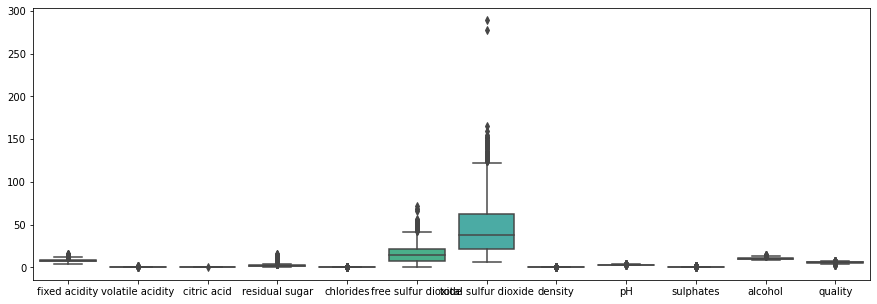

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data = data)

## Inference
1. the data points are not in same scale
2. there are a few outliers to be handled
3. the dataset has originally no null values

## for learning process we can put in some random null values

In [7]:
for i in range(0,15):
    col = np.random.randint(1, 11)
    index = data.iloc[:, [col]].sample(1).index
    data.iloc[index, [col]] = None
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             1
residual sugar          1
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    1
density                 0
pH                      4
sulphates               3
alcohol                 3
quality                 0
dtype: int64

In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
# we can consider this as categorical value
def encode(row):
    if row.quality < 4.5:
        return 0
    elif row.quality < 6.5:
        return 1
    else:
        return 2
data["quality"] = data.apply(encode,axis=1)

<AxesSubplot:xlabel='quality', ylabel='count'>

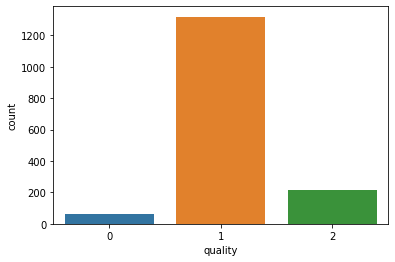

In [10]:
sns.countplot(x = data['quality'])

In [7]:
data_copy = data.copy(deep = True)

## Here we can see that most of the data belongs to medium quality wine

In [12]:
# fill na values with column mean
data = data_copy.copy(deep = True)
for i in data.columns:
    data[i] = data[i].fillna(np.mean(data[i]))
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270982,2.538892,0.087474,15.866708,46.474343,0.996747,3.310878,0.657932,10.424154,1.096310
std,1.741096,0.179060,0.194801,1.409924,0.047064,10.454999,32.894282,0.001887,0.153999,0.168997,1.064967,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


In [13]:
# fill with median
data = data_copy.copy(deep = True)
for i in data.columns:
    data[i] = data[i].fillna(np.median(data[i]))
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1599.000000,1595.000000,1596.000000,1596.000000,1599.000000
mean,8.319637,0.527821,0.270982,2.538892,0.087474,15.866708,46.474343,0.996747,3.310878,0.657932,10.424154,1.096310
std,1.741096,0.179060,0.194862,1.410365,0.047079,10.458272,32.904579,0.001887,0.154192,0.169156,1.065968,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


In [14]:
# fill with mode
data = data_copy.copy(deep = True)
for i in data.columns:
    data[i] = data[i].fillna(data[i].mode()[0])
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270813,2.538555,0.087470,15.860538,46.462789,0.996747,3.310851,0.657824,10.422420,1.096310
std,1.741096,0.179060,0.194919,1.409988,0.047065,10.457911,32.897526,0.001887,0.154000,0.169015,1.065718,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


In [15]:
# fill with ffill
data = data_copy.copy(deep = True)
for i in data.columns:
    data[i] = data[i].fillna(method = 'ffill')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270826,2.539056,0.087466,15.858662,46.467792,0.996747,3.310863,0.657942,10.422483,1.096310
std,1.741096,0.179060,0.194902,1.409939,0.047065,10.459950,32.895324,0.001887,0.154034,0.169117,1.065766,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


In [16]:
data = data_copy.copy(deep = True)
for i in data.columns:
    data[i] = data[i].fillna(method = 'bfill')
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270832,2.538743,0.087455,15.866166,46.457161,0.996747,3.310851,0.658061,10.423358,1.096310
std,1.741096,0.179060,0.194894,1.409936,0.047070,10.455022,32.901456,0.001887,0.154005,0.169055,1.065871,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


In [17]:
data = data_copy.copy(deep = True)
for i in data.columns:
    data[i] = data[i].interpolate()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270829,2.538899,0.087461,15.862414,46.462477,0.996747,3.310857,0.658002,10.422921,1.096310
std,1.741096,0.179060,0.194898,1.409924,0.047067,10.456410,32.897704,0.001887,0.154014,0.169058,1.065694,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


<AxesSubplot:xlabel='chlorides', ylabel='Count'>

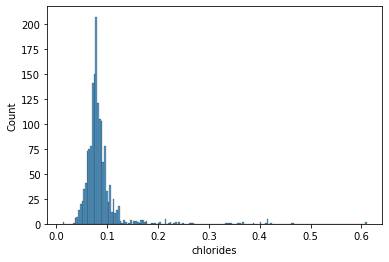

In [18]:
data = data_copy.copy(deep = True)
sns.histplot(x = data['chlorides'])

## Inference
1. free sulfur dioxide - the overall effect remains the same for any method, still filling with mean is slightly better
2. total sulfur dioxide - mean and bfill have same effect
3. alcohol - any method is applicable
4. residual sugar - here median will normalize the data more
5. chlorides - mean is more useful
6. citric acid - since it has only 1 missing value, we can safely drop it

In [8]:
data = data_copy.copy(deep = True)
data['free sulfur dioxide'] = data['free sulfur dioxide'].fillna(np.mean(data['free sulfur dioxide']))
data['total sulfur dioxide'] = data['total sulfur dioxide'].fillna(method = 'bfill')
data['alcohol'] = data['alcohol'].fillna(method = 'bfill')
data['residual sugar'] = data['residual sugar'].fillna(method='ffill')
data['chlorides'] = data['chlorides'].fillna(np.mean(data['chlorides']))

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:ylabel='free sulfur dioxide'>

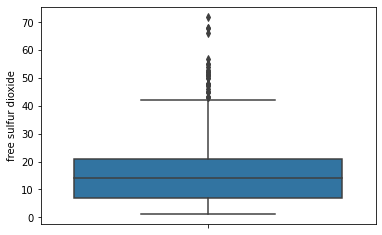

In [22]:
sns.boxplot(y = data['free sulfur dioxide'])

In [23]:
len(data[data['free sulfur dioxide']>60])/len(data)*100

0.251414204902577

### here the data above 60 can be considered as outliers and can be safely removed since its only 0.25% of total data

In [24]:
len(data)

1591

In [11]:
data.drop(data[data['free sulfur dioxide']>60].index, inplace = True)

In [11]:
len(data)

1595

<AxesSubplot:ylabel='total sulfur dioxide'>

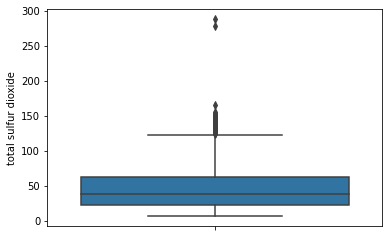

In [27]:
sns.boxplot(y = data['total sulfur dioxide'])

In [12]:
# we can remove the data points above 175
data.drop(data[data['total sulfur dioxide']>175].index, inplace = True)

<AxesSubplot:>

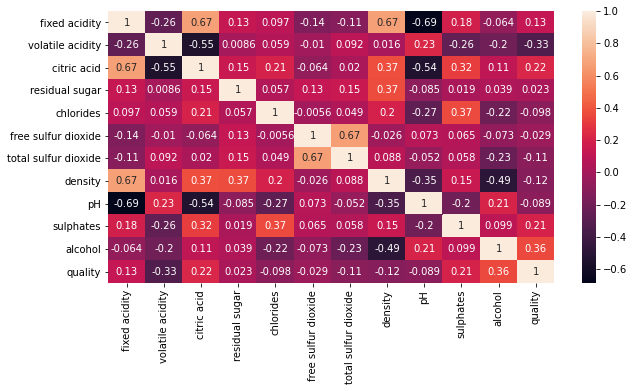

In [29]:
plt.subplots(figsize=(10, 5))
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:xlabel='quality', ylabel='pH'>

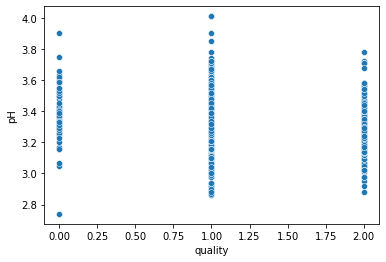

In [30]:
sns.scatterplot(x = data['quality'], y = data['pH'])

### as seen from correlation matrix and scatter plot, pH doesn't contribute much to overall quality

In [31]:
data.drop('pH', axis = 1, inplace = True)

In [32]:
data.drop('chlorides', axis = 1, inplace = True)

## as all the data is not in same scale, let's bring it down to same scale using StandardScaler

In [13]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [14]:
std = StandardScaler()
X = std.fit_transform(X)

In [16]:
y.shape

(1593,)

In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [28]:
import statsmodels.api as sm

In [30]:
x = np.append(arr = np.ones((y.shape[0], 1)).astype(int), values=X, axis=1)

In [33]:
x_opt = x[:, :]

In [37]:
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     42.10
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.76e-80
Time:                        12:03:06   Log-Likelihood:                -622.60
No. Observations:                1593   AIC:                             1269.
Df Residuals:                    1581   BIC:                             1334.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.009    121.772      0.000       1.078       1.113
x1             0.0197      0.025      0.784      0.433      -0.030       0.069
x2            -0.0801      0.012     -6.664      0.000      -0.104      -0.057
x3             0.0006      0.016      0.040      0.968      -0.030       0.032
x4             0.0110      0.012      0.946      0.344      -0.012       0.034
x5            -0.0404      0.011     -3.692      0.000      -0.062      -0.019
x6             0.0029      0.013      0.227      0.821      -0.022       0.028
x7            -0.0133      0.013     -1.002      0.316      -0.039       0.013
x8            -0.0222      0.023     -0.975      0.330      -0.067       0.022
x9            -0.0331      0.016     -2.022      0.043      -0.065      -0.001
x10            0.0618      0.011      5.735      0.000       0.041       0.083
x11            0.1089      0.016      6.957      0.000       0.078       0.140
==============================================================================
Omnibus:                       64.591   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.214
Skew:                           0.078   Prob(JB):                     1.35e-41
Kurtosis:                       4.677   Cond. No.                         7.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#3
x_opt = x[:, [0,1,2,4,5,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     46.33
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.52e-81
Time:                        12:09:58   Log-Likelihood:                -622.60
No. Observations:                1593   AIC:                             1267.
Df Residuals:                    1582   BIC:                             1326.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.009    121.810      0.000       1.078       1.113
x1             0.0200      0.024      0.845      0.398      -0.026       0.066
x2            -0.0804      0.010     -7.915      0.000      -0.100      -0.060
x3             0.0110      0.012      0.950      0.342      -0.012       0.034
x4            -0.0403      0.011     -3.816      0.000      -0.061      -0.020
x5             0.0028      0.012      0.223      0.823      -0.022       0.027
x6            -0.0132      0.013     -1.025      0.305      -0.038       0.012
x7            -0.0222      0.023     -0.975      0.330      -0.067       0.022
x8            -0.0331      0.016     -2.025      0.043      -0.065      -0.001
x9             0.0618      0.011      5.740      0.000       0.041       0.083
x10            0.1090      0.015      7.044      0.000       0.079       0.139
==============================================================================
Omnibus:                       64.588   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.171
Skew:                           0.078   Prob(JB):                     1.38e-41
Kurtosis:                       4.677   Cond. No.                         6.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#5
x_opt = x[:, [0,1,2,4,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     49.44
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           4.31e-79
Time:                        12:10:46   Log-Likelihood:                -629.90
No. Observations:                1593   AIC:                             1280.
Df Residuals:                    1583   BIC:                             1334.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.009    121.292      0.000       1.078       1.113
x1             0.0341      0.023      1.451      0.147      -0.012       0.080
x2            -0.0861      0.010     -8.544      0.000      -0.106      -0.066
x3             0.0110      0.012      0.947      0.344      -0.012       0.034
x4             0.0026      0.012      0.212      0.832      -0.022       0.027
x5            -0.0099      0.013     -0.770      0.442      -0.035       0.015
x6            -0.0305      0.023     -1.341      0.180      -0.075       0.014
x7            -0.0178      0.016     -1.118      0.264      -0.049       0.013
x8             0.0464      0.010      4.631      0.000       0.027       0.066
x9             0.1124      0.016      7.244      0.000       0.082       0.143
==============================================================================
Omnibus:                       67.544   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.308
Skew:                           0.078   Prob(JB):                     7.12e-45
Kurtosis:                       4.743   Cond. No.                         6.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#4
x_opt = x[:, [0,1,2,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     55.51
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           8.70e-80
Time:                        12:11:51   Log-Likelihood:                -630.35
No. Observations:                1593   AIC:                             1279.
Df Residuals:                    1584   BIC:                             1327.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.009    121.296      0.000       1.078       1.113
x1             0.0243      0.021      1.152      0.249      -0.017       0.066
x2            -0.0866      0.010     -8.601      0.000      -0.106      -0.067
x3             0.0039      0.012      0.314      0.753      -0.020       0.028
x4            -0.0097      0.013     -0.756      0.450      -0.035       0.016
x5            -0.0176      0.018     -0.966      0.334      -0.053       0.018
x6            -0.0228      0.015     -1.520      0.129      -0.052       0.007
x7             0.0446      0.010      4.533      0.000       0.025       0.064
x8             0.1198      0.013      8.975      0.000       0.094       0.146
==============================================================================
Omnibus:                       66.639   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.416
Skew:                           0.095   Prob(JB):                     3.68e-43
Kurtosis:                       4.705   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#2
x_opt = x[:, [0,1,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     50.55
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.43e-65
Time:                        12:18:56   Log-Likelihood:                -666.70
No. Observations:                1593   AIC:                             1349.
Df Residuals:                    1585   BIC:                             1392.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.009    118.596      0.000       1.077       1.114
x1             0.0572      0.021      2.693      0.007       0.016       0.099
x2             0.0150      0.013      1.185      0.236      -0.010       0.040
x3            -0.0195      0.013     -1.482      0.138      -0.045       0.006
x4            -0.0420      0.018     -2.280      0.023      -0.078      -0.006
x5            -0.0276      0.015     -1.797      0.072      -0.058       0.003
x6             0.0634      0.010      6.466      0.000       0.044       0.083
x7             0.1249      0.014      9.155      0.000       0.098       0.152
==============================================================================
Omnibus:                       76.563   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.752
Skew:                           0.016   Prob(JB):                     1.45e-57
Kurtosis:                       4.986   Cond. No.                         5.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#1
x_opt = x[:, [0,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     57.54
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.53e-64
Time:                        12:19:41   Log-Likelihood:                -670.34
No. Observations:                1593   AIC:                             1355.
Df Residuals:                    1586   BIC:                             1392.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.009    118.363      0.000       1.077       1.114
x1             0.0168      0.013      1.331      0.183      -0.008       0.042
x2            -0.0270      0.013     -2.098      0.036      -0.052      -0.002
x3            -0.0028      0.011     -0.247      0.805      -0.025       0.019
x4            -0.0587      0.010     -5.807      0.000      -0.079      -0.039
x5             0.0601      0.010      6.163      0.000       0.041       0.079
x6             0.1460      0.011     13.044      0.000       0.124       0.168
==============================================================================
Omnibus:                       78.399   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.320
Skew:                           0.039   Prob(JB):                     1.21e-59
Kurtosis:                       5.020   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#7
x_opt = x[:, [0,6,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     68.02
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.55e-64
Time:                        12:21:01   Log-Likelihood:                -672.55
No. Observations:                1593   AIC:                             1357.
Df Residuals:                    1587   BIC:                             1389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0954      0.009    118.236      0.000       1.077       1.114
x1            -0.0009      0.009     -0.100      0.921      -0.019       0.017
x2            -0.0027      0.011     -0.238      0.812      -0.025       0.020
x3            -0.0570      0.010     -5.651      0.000      -0.077      -0.037
x4             0.0595      0.010      6.104      0.000       0.040       0.079
x5             0.1507      0.011     13.720      0.000       0.129       0.172
==============================================================================
Omnibus:                       80.316   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.649
Skew:                           0.065   Prob(JB):                     1.88e-61
Kurtosis:                       5.049   Cond. No.                         2.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#0
x_opt = x[:, [6,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              6.939
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    2.03e-06
Time:                        12:21:29   Log-Likelihood:                         -2491.2
No. Observations:                1593   AIC:                                      4992.
Df Residuals:                    1588   BIC:                                      5019.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0009      0.029     -0.032      0.975      -0.059       0.057
x2            -0.0027      0.035     -0.076      0.939      -0.072       0.067
x3            -0.0570      0.032     -1.805      0.071      -0.119       0.005
x4             0.0595      0.031      1.950      0.051      -0.000       0.119
x5             0.1507      0.034      4.382      0.000       0.083       0.218
==============================================================================
Omnibus:                       80.316   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.649
Skew:                           0.065   Prob(JB):                     1.88e-61
Kurtosis:                       5.049   Cond. No.                         2.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#6
x_opt = x[:, [8,9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              8.678
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    6.28e-07
Time:                        12:22:31   Log-Likelihood:                         -2491.2
No. Observations:                1593   AIC:                                      4990.
Df Residuals:                    1589   BIC:                                      5012.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0026      0.035     -0.074      0.941      -0.072       0.067
x2            -0.0571      0.031     -1.816      0.070      -0.119       0.005
x3             0.0594      0.030      1.958      0.050      -0.000       0.119
x4             0.1508      0.034      4.420      0.000       0.084       0.218
==============================================================================
Omnibus:                       80.295   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.288
Skew:                           0.066   Prob(JB):                     2.26e-61
Kurtosis:                       5.047   Cond. No.                         1.97
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#8
x_opt = x[:, [9,10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              11.58
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    1.66e-07
Time:                        12:22:51   Log-Likelihood:                         -2491.2
No. Observations:                1593   AIC:                                      4988.
Df Residuals:                    1590   BIC:                                      5005.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0565      0.030     -1.857      0.063      -0.116       0.003
x2             0.0590      0.030      1.975      0.048       0.000       0.118
x3             0.1520      0.030      5.072      0.000       0.093       0.211
==============================================================================
Omnibus:                       80.267   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.224
Skew:                           0.065   Prob(JB):                     2.33e-61
Kurtosis:                       5.047   Cond. No.                         1.38
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#9
x_opt = x[:, [10,11]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              15.62
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                    1.92e-07
Time:                        12:23:12   Log-Likelihood:                         -2492.9
No. Observations:                1593   AIC:                                      4990.
Df Residuals:                    1591   BIC:                                      5001.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0715      0.029      2.454      0.014       0.014       0.129
x2             0.1389      0.029      4.765      0.000       0.082       0.196
==============================================================================
Omnibus:                       85.929   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.491
Skew:                           0.080   Prob(JB):                     8.44e-69
Kurtosis:                       5.167   Cond. No.                         1.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#11
x_opt = x[:, [10]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              8.414
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                     0.00378
Time:                        12:23:39   Log-Likelihood:                         -2504.2
No. Observations:                1593   AIC:                                      5010.
Df Residuals:                    1592   BIC:                                      5016.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0847      0.029      2.901      0.004       0.027       0.142
==============================================================================
Omnibus:                      163.134   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.343
Skew:                           0.557   Prob(JB):                     1.08e-95
Kurtosis:                       5.313   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### so finally we get 10th columns as our imp feature

In [14]:
data.to_csv('data/processed_wine.csv', index=False)

<a id='pipeline'></a>
# comibning all preprocessing steps

In [6]:
class outlierHandler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None, *args):
        return self
    
    def transform(self, X, y=None, *args):
        for i in args:
            if i == "free sulfur dioxide":
                X.drop(X[X[i]>60].index, inplace = True)
                impute = SimpleImputer(strategy='mean')
                X[i] = impute.fit_transform(X[i])
            elif i == "total sulfur dioxide":
                X.drop(X[X[i]>175].index, inplace = True)
                X[i] = X[i].fillna(method='ffill')
        return X
    
    
class custImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None, *args):
        return self
    
    def transform(self, X, y=None, *args):
        for i in args:
            if i == "chlorides":
                impute = SimpleImputer(strategy='mean')
                X[i] = impute.fit_transform(X[i])
            elif i == 'alcohol':
                X[i] = X[i].fillna(method='ffill')
            elif i == 'residual sugar':
                X[i] = X[i].fillna(method='bfill')
        return X
    
    
def encode(row):
    if row.quality < 4.5:
        return 0
    elif row.quality < 6.5:
        return 1
    else:
        return 2

In [7]:
outlier_removal = ColumnTransformer(transformers=[
    ('outlier_removal', outlierHandler(), ['free sulfur dioxide', 'total sulfur dioxide']),
], remainder='passthrough')

impute = ColumnTransformer(transformers=[
    ('imputer', custImputer(), ['chlorides', 'alcohol', 'residual sugar']),
], remainder='passthrough')

train_pipeline = Pipeline(steps=[
    ('outlier', outlier_removal)
    ('impute', impute),
    ('scale', StandardScaler())
])

test_pipeline = Pipeline(steps=[
    ('impute', impute),
    ('scale', StandardScaler())
])

In [8]:
X = data.drop('quality', axis=1)
y = data.apply(encode, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

train_X = train_pipeline.fit_transform(X_train)
test_X = test_pipeline.fit_transform(X_test)

<a id='classification'></a>
# classification

In [73]:
rdf_clf = RandomForestClassifier()
gb_clf = GaussianNB()
dsc_clf = DecisionTreeClassifier()
model_list = [rdf_clf, gb_clf, dsc_clf]

In [79]:
for i in model_list:
    i.fit(train_X, y_train)
    y_preds = i.predict(test_X)
    f1 = f1_score(y_test, y_preds, average='weighted')
    report = classification_report(y_test, y_preds, zero_division=0)
    print("for ", i)
    print("f1_score", f1)
    print("classification_report", "\n", report, "\n")

for  RandomForestClassifier()
f1_score 0.8356361607142857
classification_report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      0.96      0.92       269
           2       0.63      0.41      0.50        41

    accuracy                           0.86       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.82      0.86      0.84       320
 

for  GaussianNB()
f1_score 0.7794952659426343
classification_report 
               precision    recall  f1-score   support

           0       0.06      0.10      0.07        10
           1       0.89      0.83      0.86       269
           2       0.39      0.51      0.44        41

    accuracy                           0.76       320
   macro avg       0.45      0.48      0.46       320
weighted avg       0.80      0.76      0.78       320
 

for  DecisionTreeClassifier()
f1_score 0.76592760707635
classification_report 
   

### Random forest classfier works best for given dataset

In [113]:
class DecisionTree(object):
    """
    Class to create decision tree model (CART)
    """
    def __init__(self, _max_depth, _min_splits):
        self.max_depth = _max_depth
        self.min_splits = _min_splits

    def fit(self, _feature, _label):
        """
        :param _feature:
        :param _label:
        :return:
        """
        self.feature = _feature
        self.label = _label
        self.train_data = np.column_stack((self.feature,self.label))
        self.build_tree()


    def compute_gini_similarity(self, groups, class_labels):
        """
        compute the gini index for the groups and class labels
        :param groups:
        :param class_labels:
        :return:
        """
        num_sample = sum([len(group) for group in groups])
        gini_score = 0

        for group in groups:
            size = float(len(group))

            if size == 0:
                continue
            score = 0.0
            for label in class_labels:
                porportion = (group[:,-1] == label).sum() / size
                score += porportion * porportion
            gini_score += (1.0 - score) * (size/num_sample)

        return gini_score

    def terminal_node(self, _group):
        """
        Function set terminal node as the most common class in the group to make prediction later on
        is an helper function used to mark the leaf node in the tree based on the early stop condition
        or actual stop condition which ever is meet early
        :param _group:
        :return:
        """
        class_labels, count = np.unique(_group[:,-1], return_counts= True)
        return class_labels[np.argmax(count)]

    def split(self, index, val, data):
        """
        split features into two groups based on their values
        :param index:
        :param val:
        :param data:
        :return:
        """
        data_left = np.array([]).reshape(0,self.train_data.shape[1])
        data_right = np.array([]).reshape(0, self.train_data.shape[1])

        for row in data:
            if row[index] <= val :
                data_left = np.vstack((data_left,row))

            if row[index] > val:
                data_right = np.vstack((data_right, row))

        return data_left, data_right

    def best_split(self, data):
        """
        find the best split information using the gini score
        :param data:
        :return best_split result dict:
        """
        class_labels = np.unique(data[:,-1])
        best_index = 999
        best_val = 999
        best_score = 999
        best_groups = None

        for idx in range(data.shape[1]-1):
            for row in data:
                groups = self.split(idx, row[idx], data)
                gini_score = self.compute_gini_similarity(groups,class_labels)

                if gini_score < best_score:
                    best_index = idx
                    best_val = row[idx]
                    best_score = gini_score
                    best_groups = groups
        result = {}
        result['index'] = best_index
        result['val'] = best_val
        result['groups'] = best_groups
        return result


    def split_branch(self, node, depth):
        """
        recursively split the data and
        check for early stop argument based on self.max_depth and self.min_splits
        - check if left or right groups are empty is yess craete terminal node
        - check if we have reached max_depth early stop condition if yes create terminal node
        - Consider left node, check if the group is too small using min_split condition
            - if yes create terminal node
            - else continue to build the tree
        - same is done to the right side as well.
        else
        :param node:
        :param depth:
        :return:
        """
        left_node , right_node = node['groups']
        del(node['groups'])

        if not isinstance(left_node,np.ndarray) or not isinstance(right_node,np.ndarray):
            node['left'] = self.terminal_node(left_node + right_node)
            node['right'] = self.terminal_node(left_node + right_node)
            return

        if depth >= self.max_depth:
            node['left'] = self.terminal_node(left_node)
            node['right'] = self.terminal_node(right_node)
            return

        if len(left_node) <= self.min_splits:
            node['left'] = self.terminal_node(left_node)
        else:
            node['left'] = self.best_split(left_node)
            self.split_branch(node['left'],depth + 1)


        if len(right_node) <= self.min_splits:
            node['right'] = self.terminal_node(right_node)
        else:
            node['right'] = self.best_split(right_node)
            self.split_branch(node['right'],depth + 1)

    def build_tree(self):
        """
        build tree recursively with help of split_branch function
         - Create a root node
         - call recursive split_branch to build the complete tree
        :return:
        """
        self.root = self.best_split(self.train_data)
        self.split_branch(self.root, 1)
        return self.root

    def _predict(self, node, row):
        """
        Recursively traverse through the tress to determine the
        class of unseen sample data point during prediction
        :param node:
        :param row:
        :return:
        """
        if row[node['index']] < node['val']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'],dict):
                return self._predict(node['right'],row)
            else:
                return node['right']

    def predict(self, test_data):
        """
        predict the set of data point
        :param test_data:
        :return:
        """
        self.predicted_label = np.array([])
        for idx in test_data:
            self.predicted_label = np.append(self.predicted_label, self._predict(self.root,idx))

        return self.predicted_label

In [115]:
clf = DecisionTree(2, 30)
clf.fit(train_X, y_train)

In [117]:
y_preds = clf.predict(test_X)
f1 = f1_score(y_test, y_preds, average='weighted')
report = classification_report(y_test, y_preds, zero_division=0)
print("f1_score", f1)
print("classification_report", "\n", report, "\n")

f1_score 0.8318535649819495
classification_report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.89      0.94      0.91       269
           2       0.54      0.46      0.50        41

    accuracy                           0.85       320
   macro avg       0.48      0.47      0.47       320
weighted avg       0.82      0.85      0.83       320
 



### here our custom CART algorithm works better than sklearn's decision tree classifier but slightly lower than RandomForestClassifier

<a id='clustering'></a>
# clustering

In [12]:
X_cluster = train_pipeline.fit_transform(X)

In [10]:
kmeans = KMeans(n_clusters=3)
db = DBSCAN()
agglo = AgglomerativeClustering(n_clusters=3)
m_ls = [kmeans, db, agglo]

In [13]:
db.fit(X_cluster)
n_clusters = set(db.labels_)
len(n_clusters)

4

In [22]:
for i in m_ls:
    print("for ", i)
    i.fit(X_cluster)
    print(accuracy_score(y, i.labels_), "\n")

for  KMeans(n_clusters=3)
0.3964978111319575 

for  DBSCAN()
0.0068792995622263915 

for  AgglomerativeClustering(n_clusters=3)
0.36335209505941213 



### kmeans provides the highest accuracy, but overall the accuracy is very low

In [32]:
import queue
class CustomDBSCAN:
    def __init__(self):
        self.core = -1
        self.border = -2
    
    def neighbour_points(self, data, pointId, epsilon):
        points = []
        for i in range(len(data)):
            # Euclidian distance
            if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
                points.append(i)
        return points
    
    def fit(self, data, Eps, MinPt):
        # initialize all points as outliers
        point_label = [0] * len(data)
        point_count = []

        # initilize list for core/border points
        core = []
        border = []

        # Find the neighbours of each individual point
        for i in range(len(data)):
            point_count.append(self.neighbour_points(data, i, Eps))

        # Find all the core points, border points and outliers
        for i in range(len(point_count)):
            if (len(point_count[i]) >= MinPt):
                point_label[i] = self.core
                core.append(i)
            else:
                border.append(i)

        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = self.border
                    break

        # Assign points to a cluster

        cluster = 1

        # Here we use a queue to find all the neighbourhood points of a core point and find the
        # indirectly reachable points.
        # We are essentially performing Breadth First search of all points which are within
        # epsilon distance from each other
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == self.core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == self.border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == self.core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == self.border):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster

        return point_label, cluster

In [34]:
cust_db = CustomDBSCAN()
points, clusters = cust_db.fit(X_cluster, 0.25, 4)
print(clusters)

9


### according to custom clustering model, we have 9 cluster i.e 9 levels in quality index.
### originally we had 7 classes